<a href="https://colab.research.google.com/github/ajayyy17/ajayyy17/blob/main/DeepLearning(DogvsCat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting Dataset using Kaggle API

In [1]:
# installing the Kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

 98% 792M/812M [00:03<00:00, 240MB/s]
100% 812M/812M [00:03<00:00, 218MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the name of images

In [9]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.11776.jpg', 'cat.8575.jpg', 'dog.4390.jpg', 'dog.2536.jpg', 'cat.1464.jpg', 'cat.7831.jpg', 'dog.10914.jpg', 'cat.3754.jpg', 'cat.10764.jpg', 'cat.12174.jpg', 'cat.735.jpg', 'dog.10284.jpg', 'cat.4209.jpg', 'dog.6006.jpg', 'cat.12444.jpg', 'dog.3352.jpg', 'dog.8068.jpg', 'dog.6139.jpg', 'dog.2188.jpg', 'cat.9862.jpg', 'dog.5450.jpg', 'cat.4915.jpg', 'dog.9748.jpg', 'dog.1853.jpg', 'dog.1054.jpg', 'cat.2459.jpg', 'cat.3217.jpg', 'dog.10670.jpg', 'dog.8638.jpg', 'dog.1109.jpg', 'cat.7278.jpg', 'cat.7129.jpg', 'cat.2258.jpg', 'dog.1739.jpg', 'dog.1859.jpg', 'dog.7901.jpg', 'cat.4385.jpg', 'dog.6292.jpg', 'dog.3952.jpg', 'cat.6094.jpg', 'dog.6895.jpg', 'cat.7018.jpg', 'cat.11152.jpg', 'dog.6848.jpg', 'cat.1192.jpg', 'cat.4199.jpg', 'cat.10462.jpg', 'dog.9371.jpg', 'dog.9347.jpg', 'dog.4602.jpg', 'cat.917.jpg', 'cat.9350.jpg', 'dog.1866.jpg', 'cat.4228.jpg', 'dog.11338.jpg', 'dog.1315.jpg', 'cat.348.jpg', 'cat.6244.jpg', 'cat.4350.jpg', 'dog.2950.jpg', 'cat.6471.jpg', 'dog.5718.jpg', 

Importing the libraries 

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow 

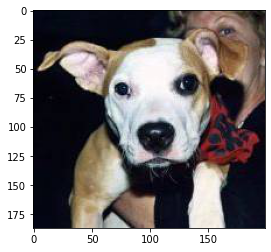

In [12]:
# display dog image
img = mpimg.imread('/content/train/dog.11776.jpg')
imgplt = plt.imshow(img)
plt.show()

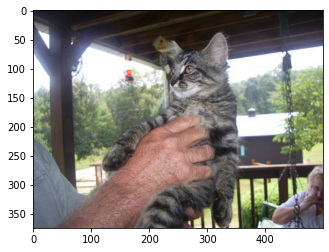

In [13]:
# display cat image
img = mpimg.imread('/content/train/cat.8575.jpg')
imgplt = plt.imshow(img)
plt.show()

In [14]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

dog
cat
dog
dog
cat


In [15]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


Resizing all the images 

In [16]:
#creating a directory for resized images
os.mkdir('/content/image resized')

In [17]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

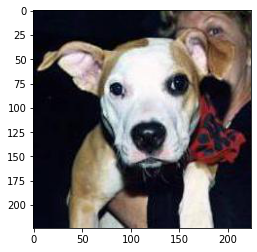

In [19]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.11776.jpg')
imgplt = plt.imshow(img)
plt.show()

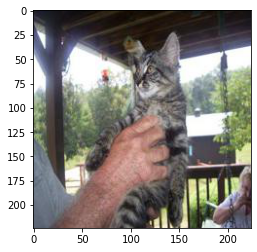

In [21]:
# display cat image
img = mpimg.imread('/content/image resized/cat.8575.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating Lables for dogs and cats ---
DOGS -- 1
CATS -- 0 

In [24]:
#loop to assing labels
filenames = os.listdir('/content/image resized')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [25]:
print(filenames[0:5])
print(len(filenames))

['dog.11776.jpg', 'cat.8575.jpg', 'dog.4390.jpg', 'dog.2536.jpg', 'cat.1464.jpg']
2000


In [26]:
print(labels[0:5])
print(len(labels))

[1, 0, 1, 1, 0]
2000


In [27]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1033  967]


Converting all the resized images to numpy arrays

In [28]:
import cv2
import glob

In [29]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [30]:
print(dog_cat_images)

[[[[ 24   9   7]
   [ 24   9   7]
   [ 24   9   7]
   ...
   [ 65  78  70]
   [ 82  95  87]
   [ 91 104  96]]

  [[ 24   9   7]
   [ 24   9   7]
   [ 24   9   7]
   ...
   [ 48  61  53]
   [ 64  76  70]
   [ 73  86  78]]

  [[ 24   9   7]
   [ 24   9   7]
   [ 24   9   7]
   ...
   [ 31  41  35]
   [ 43  52  49]
   [ 50  60  54]]

  ...

  [[ 21   6   4]
   [ 21   6   4]
   [ 21   6   4]
   ...
   [ 27  11   5]
   [ 27  11   5]
   [ 27  11   5]]

  [[ 21   6   4]
   [ 21   6   4]
   [ 21   6   4]
   ...
   [ 27  11   5]
   [ 27  11   5]
   [ 26  10   4]]

  [[ 21   6   4]
   [ 21   6   4]
   [ 21   6   4]
   ...
   [ 27  11   5]
   [ 27  11   5]
   [ 27  11   5]]]


 [[[ 48  48  48]
   [ 47  47  47]
   [ 49  44  45]
   ...
   [ 17  16  18]
   [ 17  16  18]
   [ 17  16  18]]

  [[ 47  45  45]
   [ 44  42  42]
   [ 41  36  37]
   ...
   [ 18  17  19]
   [ 17  16  18]
   [ 17  16  18]]

  [[ 42  37  38]
   [ 40  35  36]
   [ 39  33  34]
   ...
   [ 18  17  19]
   [ 18  17  19]
   [ 17  16

In [31]:
type(dog_cat_images)

numpy.ndarray

In [32]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [33]:
X = dog_cat_images
Y = np.asarray(labels)

Splitting the data into training and test set 

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


# FeatureScaling the dataset 

In [36]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [37]:
print(X_train_scaled)

[[[[0.18431373 0.20392157 0.30196078]
   [0.11372549 0.13333333 0.23137255]
   [0.10588235 0.12156863 0.23137255]
   ...
   [0.09411765 0.1372549  0.15294118]
   [0.09411765 0.1372549  0.15294118]
   [0.09411765 0.1372549  0.15294118]]

  [[0.19215686 0.21176471 0.30980392]
   [0.11764706 0.1372549  0.23529412]
   [0.10588235 0.12156863 0.23137255]
   ...
   [0.09411765 0.1372549  0.15294118]
   [0.09411765 0.1372549  0.15294118]
   [0.09411765 0.1372549  0.15294118]]

  [[0.20392157 0.22352941 0.32156863]
   [0.12156863 0.14117647 0.23921569]
   [0.10588235 0.12156863 0.23137255]
   ...
   [0.09411765 0.1372549  0.15294118]
   [0.09411765 0.1372549  0.15294118]
   [0.09411765 0.1372549  0.15294118]]

  ...

  [[0.21568627 0.19607843 0.18431373]
   [0.21568627 0.19607843 0.18431373]
   [0.22352941 0.19607843 0.18431373]
   ...
   [0.00784314 0.01176471 0.00392157]
   [0.00784314 0.01176471 0.00392157]
   [0.00784314 0.01176471 0.00392157]]

  [[0.21568627 0.19607843 0.18431373]
   [0.2

# Building the neural network

In [38]:
import tensorflow as tf
import tensorflow_hub as hub

In [39]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [40]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [41]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [42]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 48s 853ms/step - loss: 0.2009 - acc: 0.9212
Epoch 2/5
50/50 [==============================] - 43s 869ms/step - loss: 0.0695 - acc: 0.9737
Epoch 3/5
50/50 [==============================] - 43s 864ms/step - loss: 0.0480 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 44s 887ms/step - loss: 0.0387 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 44s 877ms/step - loss: 0.0316 - acc: 0.9925


In [43]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 14s 1s/step - loss: 0.0347 - acc: 0.9825
Test Loss = 0.03469495475292206
Test Accuracy = 0.9825000166893005


# PREDECTIVE SYSTEM

Path of the image to be predicted: /content/images.jpeg


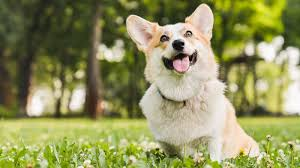

1/1 [==============================] - 0s 57ms/step
[[-0.1059607  0.2583705]]
1
The image represents a Dog


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')